In [1]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sys
import cartopy.crs as ccrs

from coral_project_functions import make_coral_map

# Reference for the data refered to as hughes in this code:

# Hughes, T. P. et al. Spatial and temporal patterns of mass bleaching of
# corals in the Anthropocene. Science 359, 80–83 (2018).

# Read data from the Hughes supplemental material.  The first
# sheet is a cut-and-paste from their document with obvious typos
# fixed by hand and a few columns added for easier data manipulation.
# The second sheet has been arranged for easier import.
filename = '../data/Hughes100Reefs.xlsx' 
hughes = pd.read_excel(filename,header=0,sheet_name=1, na_values='-')
# Missing size values are set to zero - be careful how they are used later!
# hughes.Size_km2 = hughes.Size_km2.replace({"-": "0"})

## Columns from Hughes et al. are
1. Hughes Reef - the index used in their data, 1-100.
2. Region - my code for their region labels.
    + AuA - Australasia
    + IO-ME - Indian Ocean/ Middle East
    + Pac - Pacific
    + WAtl - West Atlantic
3. Location - their location name for each reef. 
4. Numeric Lat - decimal values between about -35 and +35
5. Numeric Lon - decimal values between -180 and +180
6. Size_km2 - area in square kilometers, sometimes omitted.
7. Year - columns 7 to 43 - one column for each year of data, 1980 to 2016.  Values are blank, S, or M.
44. Severe count - the count of the number of cells in this row with the entry "S". values 0-7
45. Moderate count - the count of the number of cells in this row with the entry "M".  Values 0-12

In [2]:
# Now read our data for reef cell locations.
import scipy.io as sio

# Reference for all data for the 1,925 reef cell model.
# This has not been submitted to a journal yet, so all is subject to change:
#
# Logan, C. A., Dunne, J. P., Ryan, J. S., Baskett, M. L. & Donner, S. D. Can symbiont
# diversity and evolution allow corals to keep pace with global warming
# and ocean acidification? prep (2018).

# A copy of the data is in this repository.  The reference copy is in
# my Coral-Model-Data repository in the ProjectionsPaper directory.
mat_data = sio.loadmat('../data/ESM2M_SSTR_JD.mat')
# Put just the lat/lon columns into a data frame.  Note that they are stored
# with longitude first in the incoming data.
cells = pd.DataFrame(mat_data['ESM2M_reefs_JD'], columns=['Lon', 'Lat'])
del mat_data  # this gets garbage collected, saving around 200 MB.


<IPython.core.display.Javascript object>


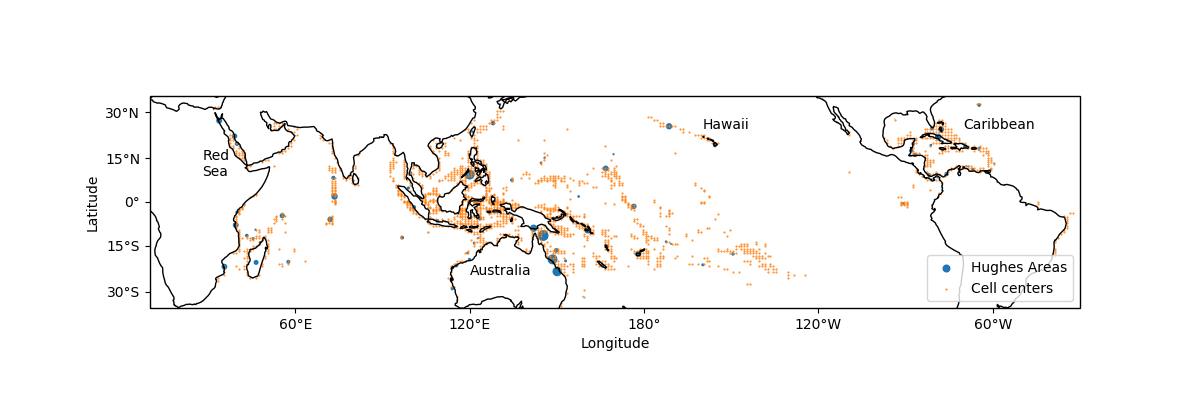

In function, extent =  [10, 330, -35, 35]


Text(20,25,'Hawaii')

In [3]:
plt.figure(figsize=[12, 4])
ax = make_coral_map()
# Hughes reef areas can be large.  Make size proportional.  Conveniently, the marker
# size argument is in square units.  However, our map is in degree units and the areas
# are in kilometers.  This should be calculated carefully for map display, but for now
# just to a rough conversion.  The initial value relates to pixels per square degree.
conversion = 60*(1/111)**2

lon = hughes['Numeric Lon']
plt.scatter(lon-180*(np.sign(lon)-1), hughes['Numeric Lat'], marker='o',
            s=conversion*hughes.Size_km2.astype(float),
            label='Hughes Areas', transform=ccrs.PlateCarree())
# Mark our cells with small dots.
# scatter is broken so that the "," argument to plot pixels is ignored.
# use s=1 to make a very small dot.
lon = cells['Lon']
plt.scatter(lon-180*(np.sign(lon)-1), cells['Lat'], marker='.', s=1, label='Cell centers',
           transform=ccrs.PlateCarree())
plt.legend()
plt.text(110, 25, 'Caribbean')
plt.text(-60, -25, 'Australia')
plt.text(-152, 9, 'Red\nSea')
plt.text(20, 25, 'Hawaii')

Area size min/max/mean/median: 2.0 9319.0 945.1030927835052 343.0 km^2


<IPython.core.display.Javascript object>


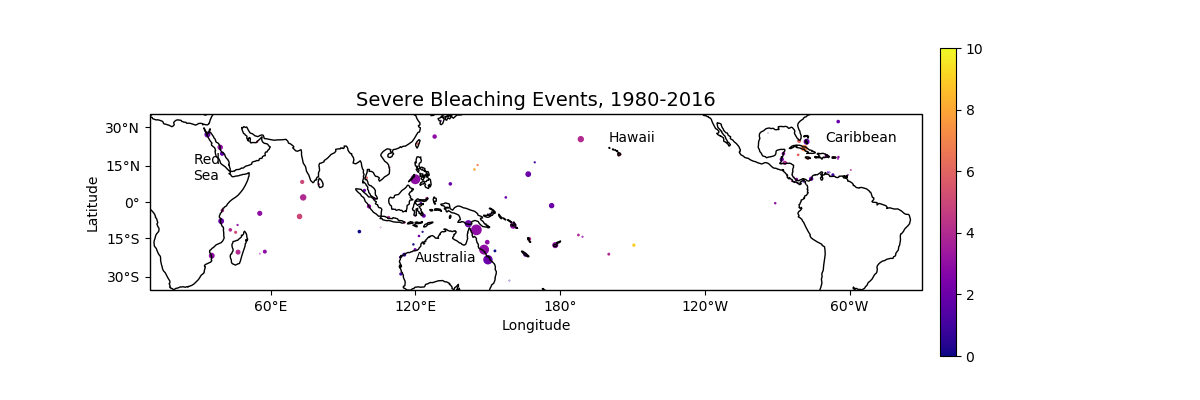

In function, extent =  [10, 330, -35, 35]


Text(20,25,'Hawaii')

In [4]:
# Now try an indication of bleaching severity.
sss = hughes.Size_km2.astype(float)
sss = sss[~np.isnan(sss)]
print("Area size min/max/mean/median:", min(sss), max(sss), np.mean(sss), np.median(sss), 'km^2')

plt.figure(figsize=[12, 4])
ax = make_coral_map()
conversion = 60*(1/111)**2
lon = hughes['Numeric Lon']
severity = hughes['Severe count']
plt.scatter(lon-180*(np.sign(lon)-1), hughes['Numeric Lat'], marker='o', 
            s=conversion*hughes.Size_km2.astype(float),
            label='Hughes Areas',
            c=severity,
            cmap="plasma",
            transform=ccrs.PlateCarree())

plt.title('Severe Bleaching Events, 1980-2016', fontsize=14)
plt.clim(0, 10)
plt.colorbar(pad=0.02)
plt.text(110, 25, 'Caribbean')
plt.text(-60, -25, 'Australia')
plt.text(-152, 9, 'Red\nSea')
plt.text(20, 25, 'Hawaii')

<IPython.core.display.Javascript object>


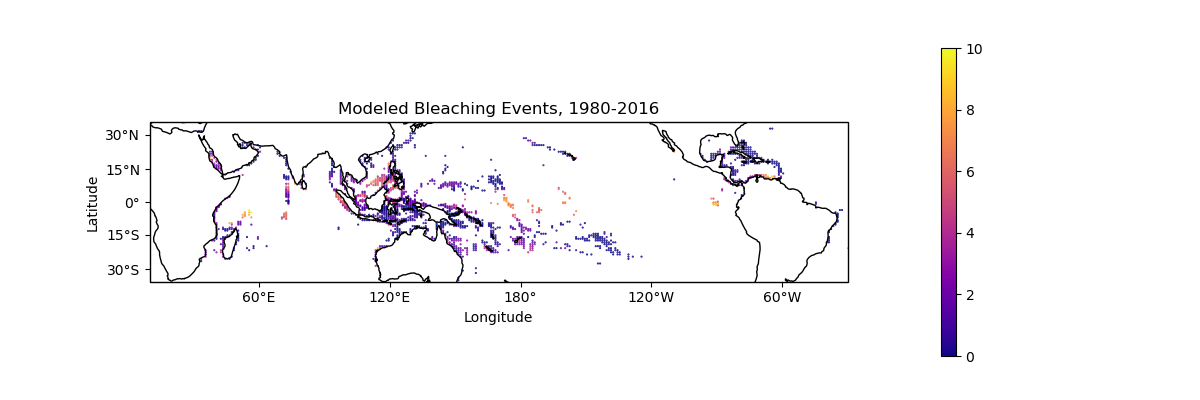

In function, extent =  [10, 330, -35, 35]


In [5]:
# Look at Bleaching events from the numerical model, using the same scale as
# the previous plot of Hughes data.

mat_data = sio.loadmat('../data/HughesCompEvents_selV_rcp60E=1OA=1.mat')
# Put the bleaching counts into a data frame.
modelBleaching = pd.DataFrame(mat_data['events80_2016'])
modelBleaching.rename(columns={0: 'Events'}, inplace=True)
# Be we really want this in the cells dataframe
cells['Events'] = modelBleaching['Events']
del mat_data
del modelBleaching
plt.figure(figsize=[12, 4])
ax = make_coral_map()
conversion = 60*(1/111)**2

lon = cells['Lon']
plt.scatter(lon-180*(np.sign(lon)-1), cells['Lat'], c = cells['Events'],
            marker='.', s=1, label='Events', cmap="plasma",
            transform=ccrs.PlateCarree())
plt.title('Modeled Bleaching Events, 1980-2016')
plt.clim(0, 10)
plt.colorbar(pad=0.10)

In [6]:
cells.head()

,Lon,Lat,Events
0,-179.5,-19.145246,2
1,-179.5,-18.311912,2
2,-179.5,-17.500333,2
3,-179.5,-16.710136,1
4,-179.5,-15.940584,1


In [7]:
hughes.head()

,Hughes Reef,Region,Location,Numeric Lat,Numeric Lon,Size_km2,1980,1981,1982,1983,...,2009,2010,2011,2012,2013,2014,2015,2016,Severe count,Moderate count
0,1,AuA,"Australia, Coral Sea Northern",-16.5,149.8,1165.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,S,3,1
1,2,AuA,"Australia, Coral Sea Southern",-20.0,153.0,231.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,M,0,1
2,3,AuA,"Australia, GBR Central",-19.5,148.5,7735.0,M,NaN,NaN,M,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,S,3,5
3,4,AuA,"Australia, GBR Northern",-11.5,145.3,9319.0,M,NaN,NaN,M,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,S,3,2
4,5,AuA,"Australia, GBR Southern",-23.5,150.1,6872.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,M,2,2


In [8]:
# To make a fair comparison, we need to figure out which of our cells match Hughes reef areas.
# Each area has a center and an area, so we can use a circle of that area as a first-order guess.
# Unfortunately, it seems that the areas are quite warped, because some of the centers are far
# inland.

# Try scipy.spatial.cKDTree to find neighbors.
from scipy import spatial
# Build the tree (a binary trie) of our cells.
# NOTE: cells.as_matrix({'Lon', 'Lat'}) does not return the columns in a determinate order!
# explicitly stack the columns instead.
lonlat = np.column_stack((cells['Lon'], cells['Lat']))
tree = spatial.cKDTree(lonlat)

# For each of the 100 Hughes cells, get a list of our cells which are likely to overlap.
# I failed to find a way to add variable-length lists to a column, so the lists are stored
# separately.
hughes = hughes.assign(radius_km=hughes.Size_km2**0.5)
cell_lists = [[] for i in range(len(hughes))]
match_idx = np.zeros(len(hughes), dtype=np.bool)
for i in range(len(hughes)):
    # convert radius to degrees (ignoring change of size with latitude for now)
    # also, add 0.5 degrees as a rough allowance for our cell size
    # radius = 0.5 + hughes.radius_km[i] / 111
    # Experimentally, try a large radius to compare over larger areas even without overlap.
    # 0 gives 15 comparisons, 0.5 gives 76, 2.0 gives 93.  In all cases there's an
    # insignificant negative correlation in bleaching.
    radius = 0.5 + hughes.radius_km[i] / 111

    c = tree.query_ball_point([hughes['Numeric Lon'][i], hughes['Numeric Lat'][i]],
                              radius, n_jobs=2)
    # Convert zero-based indexes to 1-based cell numbers.
    cell_lists[i] = [x+1 for x in c]
    match_idx[i] = len(c) > 0

print(cell_lists)

# Hughes et al. assigns each reef area to a region.  Repeat the use of the tree with
# a large enough radius that each cell is matched to some hughes area, and store the
# area name in the cell dataframe.  This allows us to assign each cell to a region.
# To increase the odds of high quality matches, this will be run at a small radius
# first, which then increases.  Matches found at a small radius will not be overwritten
# by matches at a large radius.
cells = cells.assign(Region='none')
cells_assigned = 0
r = 0.5
while cells_assigned < 1925:
    for i in range(len(hughes)):
        # 0 gives 15 comparisons, 0.5 gives 76, 2.0 gives 93.  In all cases there's an
        # insignificant negative correlation in bleaching.
        radius = r + hughes.radius_km[i] / 111
        c = tree.query_ball_point([hughes['Numeric Lon'][i], hughes['Numeric Lat'][i]],
                                  radius, n_jobs=-1)
        # Convert zero-based indexes to 1-based cell numbers.
        region = hughes.Region[i]
        #print('Reef', i, 'region', region, 'found ', c)
        for x in c:
            if cells.loc[x, 'Region'] == 'none':
                cells.loc[x, 'Region'] = region
                cells_assigned = cells_assigned + 1
    print('After r =', r, ',', cells_assigned, 'are assigned.')
    r = r * 2

# Some special cases are easier to identify visually than with the approach above.
# South atlantic, off Brazil is initially id'd as Indian Ocean/ Middle East!
# Make a bounding box to specify these cells
box = [-40, -25, -26, -16]
cells.loc[(cells.Lat > box[2]) & (cells.Lat < box[3]) & (cells.Lon > box[0]) &
          (cells.Lon < box[1]), 'Region'] = "WAtl"
# Others off Brazil are labeled Pacific.
box = [-39, -34, -16, -8]
cells.loc[(cells.Lat > box[2]) & (cells.Lat < box[3]) & (cells.Lon > box[0]) &
          (cells.Lon < box[1]), 'Region'] = "WAtl"
# Some SW Caribbean cells are id'd as Pacific
box = [-83, -80,  12, 16]
cells.loc[(cells.Lat > box[2]) & (cells.Lat < box[3]) & (cells.Lon > box[0]) &
          (cells.Lon < box[1]), 'Region'] = "WAtl"
box = [-81, -76, 8.8, 11]
cells.loc[(cells.Lat > box[2]) & (cells.Lat < box[3]) & (cells.Lon > box[0]) &
          (cells.Lon < box[1]), 'Region'] = "WAtl"

print('Pacific:', sum(cells['Region'] == 'Pac'))
print('Indian Ocean - Middle East:', sum(cells['Region'] == 'IO-ME'))
print('Australasia:', sum(cells['Region'] == 'AuA'))
print('West Atlantic:', sum(cells['Region'] == 'WAtl'))
cells.to_pickle('../results/Logan_cells_events_region.pkl')
cells.head()

[[1601, 1602, 1624], [], [1597, 1578, 1560, 1579, 1598], [1513, 1512, 1528], [], [991], [1738], [], [961], [], [], [1679], [], [1496], [], [994, 993], [1198, 1197], [915], [935], [1267, 1268], [1093, 1126], [1232, 1233], [813, 812, 814], [], [1357, 1342], [831], [1630, 1631, 1652], [1107, 1108, 1136, 1135, 1137], [1759, 1758, 1766], [], [807, 808], [], [1181, 1225], [851], [762, 763], [1086], [1147, 1148], [656, 665, 657, 666], [553], [], [680, 706], [516, 517], [], [], [695, 696, 697], [636, 635], [565, 566], [476, 477], [502], [487, 488], [624, 625], [572], [], [], [492, 493, 494], [], [71], [], [1540], [103], [275], [], [1906, 1912, 1913], [144], [240, 241, 239], [1525, 1524], [126], [70, 73], [], [1903, 1904], [], [1785, 1786], [1457, 1458], [], [], [1811, 1810, 1827, 1828], [57], [1798, 1818], [342, 331, 343], [445], [258], [422], [402], [420], [301], [348], [], [329], [398, 402], [399], [311, 304], [224], [256, 265, 266], [338, 339], [260, 261], [283, 296], [], [419], [441, 440],

,Lon,Lat,Events,Region
0,-179.5,-19.145246,2,Pac
1,-179.5,-18.311912,2,Pac
2,-179.5,-17.500333,2,Pac
3,-179.5,-16.710136,1,Pac
4,-179.5,-15.940584,1,Pac


In [9]:
# Now that we have a correspondence between Hughes areas and Logan cells, we can
# compare the bleaching for those which have some overlap.
# Add a column for cell-based bleaching values
hughes = hughes.assign(cell_bleach=np.zeros(len(hughes)))
for i in range(len(hughes)):
    if len(cell_lists[i]) > 0:
        count = 0;
        for n in cell_lists[i]:
            # "n-1" because cells are 1-based and modelBleaching is 0-based
            count = count + cells.loc[n-1, 'Events']
        hughes.loc[i, 'cell_bleach'] = count / len(cell_lists[i])


<IPython.core.display.Javascript object>


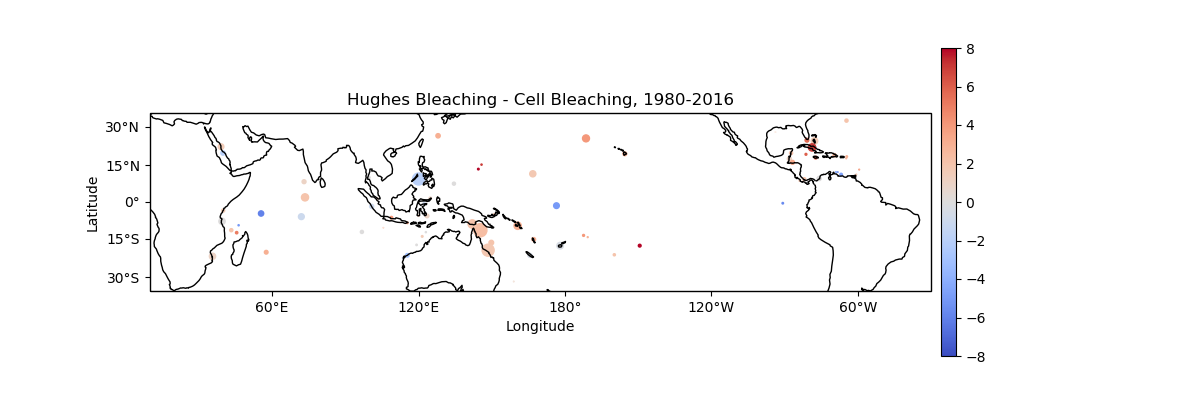

In function, extent =  [10, 330, -35, 35]
There are 76 areas with comparisons.


In [10]:
# Plot the Hughes reefs, but only those which Logan cells to compare to.
# Color the markers by the ratio between the two bleaching values.
plt.figure(figsize=[12, 4])
ax = make_coral_map()

conversion = 120*(1/111)**2
lon = hughes[match_idx]['Numeric Lon']

print("There are", len(lon), "areas with comparisons.")
severity = hughes[match_idx]['Severe count'] - hughes[match_idx]['cell_bleach']
# Both zero counts as a ratio of 1.
severity[np.isnan(severity)] = 1  
# Divide by zero is arbitrarily 12.  FIND A BETTER COMPARISON!
severity[np.isinf(severity)] = 12
plt.scatter(lon, hughes[match_idx]['Numeric Lat'], marker='o', 
            s=conversion*hughes[match_idx].Size_km2.astype(float),
            label='Hughes Areas',
            c=severity,
            cmap='coolwarm',
            transform=ccrs.PlateCarree())

plt.title('Hughes Bleaching - Cell Bleaching, 1980-2016')
plt.clim(-8, 8)
plt.colorbar(pad=0.01)

<IPython.core.display.Javascript object>


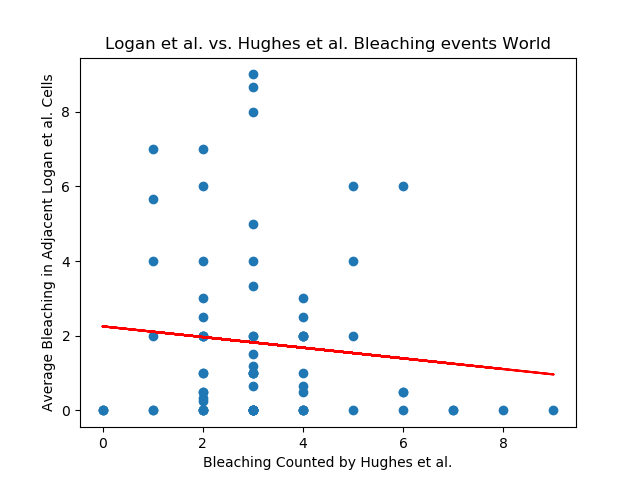

r-squared: 0.011464523508040886


In [11]:
# That doesn't look great.  What is the correlation?
from coral_project_functions import bleach_scatter

h_match = hughes[match_idx]   
bleach_scatter(hughes[match_idx], 'World')

<IPython.core.display.Javascript object>


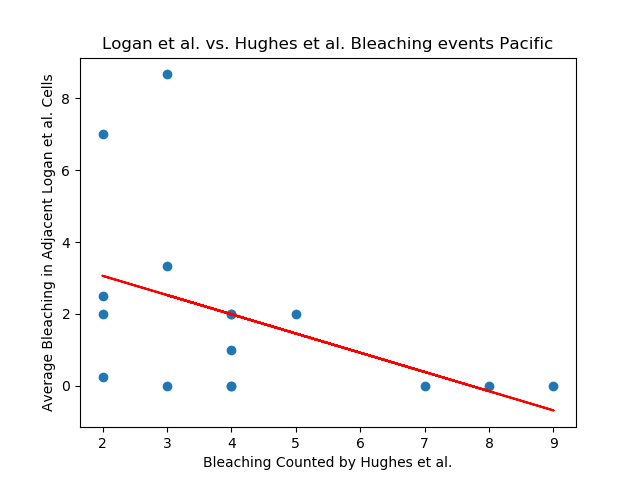

r-squared: 0.20106817711092898


In [12]:
# Now see if he correlation is better regionally.
h_match_region = h_match[h_match['Region'] == 'Pac']
bleach_scatter(h_match_region, 'Pacific')

In [13]:
# Examine the two upper left points
print(h_match_region[h_match_region['cell_bleach'] > 6])

    Hughes Reef Region                   Location  Numeric Lat  Numeric Lon  \
64           65    Pac                  Galapagos         -0.5        -90.8   
69           70    Pac  Kiribati, Gilbert Islands         -1.5        176.5   

    Size_km2 1980 1981 1982 1983     ...     2011 2012 2013 2014 2015 2016  \
64     126.0  NaN  NaN  NaN    S     ...      NaN  NaN  NaN  NaN  NaN  NaN   
69    1718.0  NaN  NaN  NaN  NaN     ...      NaN  NaN  NaN  NaN  NaN  NaN   

   Severe count Moderate count  radius_km cell_bleach  
64            3              0  11.224972    8.666667  
69            2              0  41.448764    7.000000  

[2 rows x 47 columns]


### Outlier notes
The two outlying locations are in the Galapagos and Kiribati, to use their Hughes names.  
Galapagos has a land area of around 7000 $km^2$ and Hughes has a reef area of 126 $km^2$.
Kiribati has a land area of 800 $km^2$ (wikipedia) and Hughes has a reef area of 1718 $km^2$.
While Kiribati is closer to the Galapagos than most Pacific islands and they are both
equatorial, they are quite far apart (over 90 deg longitude) and there is little reason
to group them.

<IPython.core.display.Javascript object>


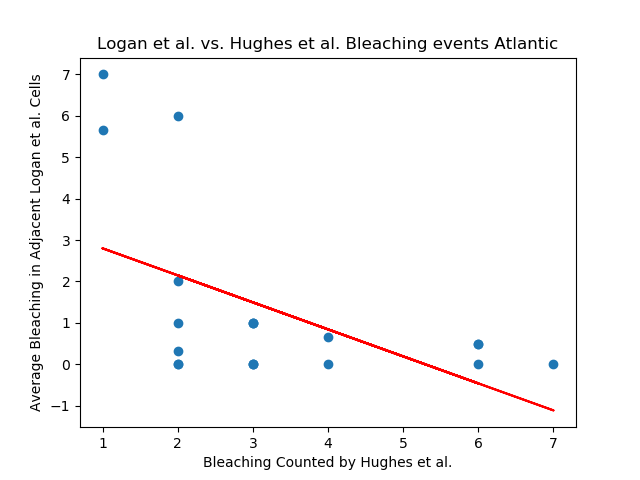

r-squared: 0.27113209700579427


In [14]:
h_match_region = h_match[h_match['Region'] == 'WAtl']
bleach_scatter(h_match_region, 'Atlantic')

In [14]:
# Examine the three upper left points
print(h_match_region[h_match_region['cell_bleach'] > 4])

    Hughes Reef Region   Location  Numeric Lat  Numeric Lon  Size_km2 1980  \
82           83   WAtl    Bonaire         12.2        -68.3      22.0  NaN   
88           89   WAtl    Curacao         12.2        -69.0      47.0  NaN   
99          100   WAtl  Venezuela         11.2        -66.9     349.0  NaN   

   1981 1982 1983     ...     2011 2012 2013 2014 2015 2016 Severe count  \
82  NaN  NaN  NaN     ...      NaN  NaN  NaN  NaN    M  NaN            1   
88  NaN  NaN  NaN     ...      NaN  NaN  NaN  NaN  NaN  NaN            2   
99  NaN  NaN  NaN     ...      NaN  NaN  NaN  NaN  NaN  NaN            1   

   Moderate count  radius_km cell_bleach  
82              5   4.690416    7.000000  
88              3   6.855655    6.000000  
99              5  18.681542    5.666667  

[3 rows x 47 columns]


### Outlier notes
The three outlying locations are Bonaire, Curacao, and Venezuela, to use their Hughes names.  
Curacao has a land area of 444 $km^2$ (Wikipedia) and Hughes has a reef area of 47 $km^2$.
Bonaire has a land area of 295 $km^2$ (wikipedia) and Hughes has a reef area of 22 $km^2$.
Venezuela is continental, and the Hughes are is 349 $km^2$, perhaps corresponding to the Gran Roque reef east of Bonaire.
It is interesting that these outliers are adjacent, and have low bleaching according to Hughes and higher bleaching in our model.
Repeating the plot with these three locations removed only decreases the $R^2$ value, and the slope is still negative.

<IPython.core.display.Javascript object>


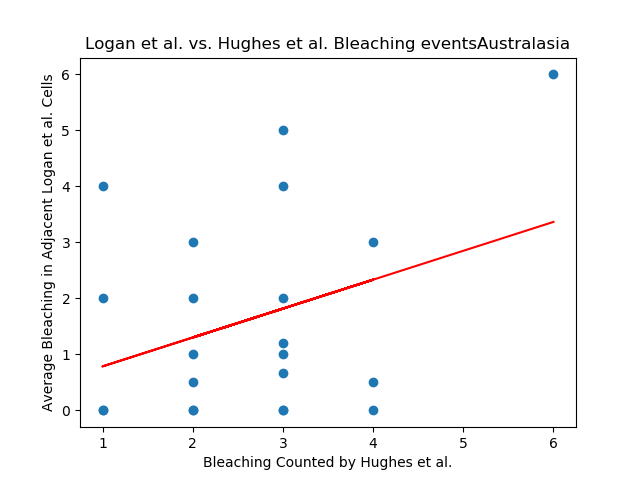

r-squared: 0.12012090457134492


In [22]:
h_match_region = h_match[h_match['Region'] == 'AuA']
bleach_scatter(h_match_region, 'Australasia')

<IPython.core.display.Javascript object>


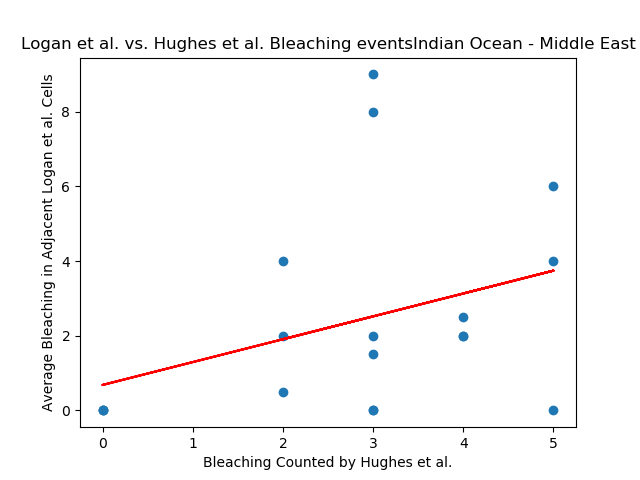

r-squared: 0.12581939870166992


In [23]:
h_match_region = h_match[h_match['Region'] == 'IO-ME']
bleach_scatter(h_match_region, 'Indian Ocean - Middle East')

## Another subset approach - by size
Plot this same comparison using only the smallest and only the largest reef areas, based on Hughes


<IPython.core.display.Javascript object>


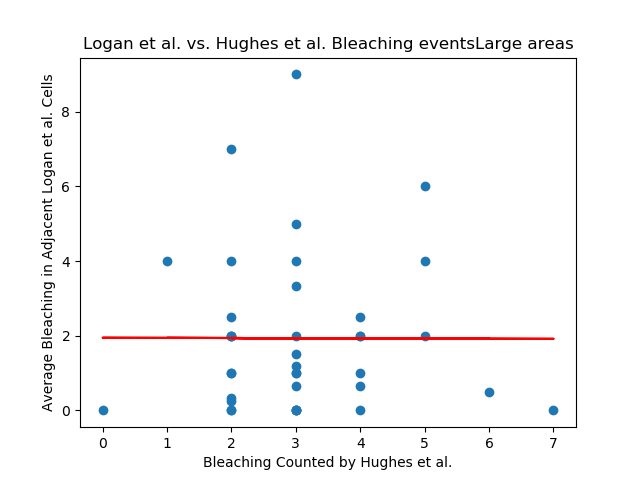

r-squared: 7.05454151843201e-06


<IPython.core.display.Javascript object>


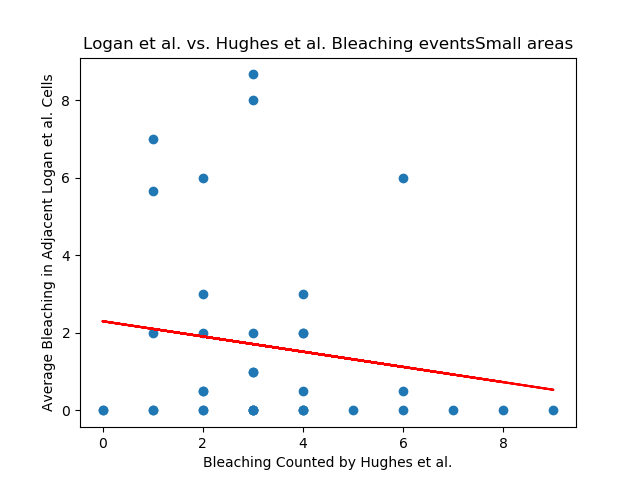

r-squared: 0.026231591776090857


In [24]:
median_area = np.median(h_match['Size_km2'])
h_match_big = h_match[h_match['Size_km2'] >= median_area]
h_match_small = h_match[h_match['Size_km2'] < median_area]

# Biggest half
bleach_scatter(h_match_big, 'Large areas')

# Smallest half
bleach_scatter(h_match_small, 'Small areas')